# Defining  an  "adopted  user"   as  a  user  who   has  logged  into  the  product  on  three  separate days  in  at  least  one  seven­day  period ,  identify  which  factors  predict  future  user adoption. 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
import json
%matplotlib inline

In [2]:
# Import Train and Test Data 
dfdir= '/Users/Administrator/Desktop/'
df_tue = pd.read_csv(dfdir + 'takehome_user_engagement.csv', encoding='latin-1')
dfengagement= pd.DataFrame(df_tue)
dfengagement

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1
...,...,...,...
207912,2013-09-06 06:14:15,11996,1
207913,2013-01-15 18:28:37,11997,1
207914,2014-04-27 12:45:16,11998,1
207915,2012-06-02 11:55:59,11999,1


In [3]:
dfengagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [4]:
# Import  Data 
dfpath= '/Users/Administrator/Desktop/'

dfdata =  pd.read_csv(dfpath + 'takehome_users.csv',encoding='ISO-8859-1')

mydf = pd.DataFrame(dfdata)
mydf.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [5]:
#exploring dataset
mydf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


# Defining  an  "adopted  user"   as  a  user  who   has  logged  into  the  product  on  three  separate days  in  at  least  one  seven­day  period 

In [6]:
dfengagement.time_stamp = pd.to_datetime(dfengagement.time_stamp)
dfengagement.index = dfengagement.time_stamp

In [7]:
# Group by user_id with a 1 week period 
df_grp = dfengagement.groupby([pd.Grouper(freq = 'W'), 'user_id']).sum()

In [8]:
adopted = df_grp
Active = []

for x in adopted.visited:
    if x >= 3: 
       Active.append('1') 
    elif x < 3: 
       Active.append('0') 
adopted['Active'] = Active

An "adopted user" as a user who has logged into the product on three separate days in at least one seven­day period is defined

In [9]:
# Reset index
adopted = adopted.reset_index()
adopted.head(20)

,time_stamp,user_id,visited,Active
0,2012-06-03,563,1,0
1,2012-06-03,1693,1,0
2,2012-06-03,1995,1,0
3,2012-06-03,2120,1,0
4,2012-06-03,2136,1,0
5,2012-06-03,2494,1,0
6,2012-06-03,2568,1,0
7,2012-06-03,3428,1,0
8,2012-06-03,3514,1,0
9,2012-06-03,3721,1,0


In [10]:
# join both tables 
df_join = mydf.merge(adopted, how = 'inner', left_on = 'object_id', right_on = 'user_id')

In [11]:
# drop all nan values
df_join.dropna()
df_join.head(20)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,time_stamp,user_id,visited,Active
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,2014-04-27,1,1,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-11-17,2,1,0
2,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-12-01,2,1,0
3,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-12-15,2,1,0
4,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-12-29,2,1,0
5,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2014-01-05,2,1,0
6,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2014-01-12,2,1,0
7,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2014-02-09,2,3,1
8,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2014-02-16,2,2,0
9,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2014-03-09,2,1,0


In [12]:
# Other than user_id, all of the columns dropped had a negative correlation towards the column "Active"
df_join = df_join.drop(['object_id', 'opted_in_to_mailing_list','enabled_for_marketing_drip', 'invited_by_user_id', 'creation_time','last_session_creation_time','time_stamp'], axis=1)

In [13]:
df_join.head()

,name,email,creation_source,org_id,user_id,visited,Active
0,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,11,1,1,0
1,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1,2,1,0
2,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1,2,1,0
3,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1,2,1,0
4,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1,2,1,0


In [14]:
#x and y axes input data
y = df_join['Active']
x = df_join.drop(['Active'], axis = 1)

In [13]:
adopted.Active

0        0
1        0
2        0
3        0
4        0
        ..
68802    0
68803    0
68804    1
68805    0
68806    1
Name: Active, Length: 68807, dtype: object

In [11]:
#actual current count of active and non active users before predictions
adopted['Active'].value_counts()

0    34948
1    33859
Name: Active, dtype: int64

# identify  which  factors  predict  future  user adoption.


In [16]:
#preprocessing 
from sklearn.preprocessing import OneHotEncoder
traindfcat = x.select_dtypes(include ='object') 
enc = OneHotEncoder(sparse=False)
X_transfCat = enc.fit_transform(traindfcat)

In [17]:
# Split data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_transfCat, y, test_size=0.2)

In [17]:
# Logistic Regression Model 
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
clf_lrm = LogisticRegression(max_iter=1000)
lrm = clf_lrm.fit(X_train, y_train)

y_pred = lrm.predict(X_test)
#print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average='weighted'))


0.7462799289997492


f1 score 70% if features engineered smartly will have suces in real world application

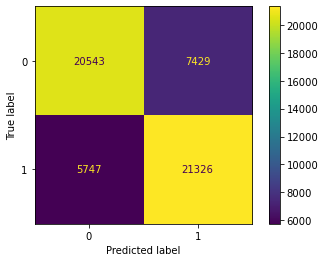

In [20]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
plot_confusion_matrix(lrm, X_train, y_train)  
plt.show() 

Real numbers

0    34948

1    33859

what Logistic regression model predicted 

0    20543

1    21326

30% of accuracy error 

In [23]:
y_preds = clf_lrm.predict_proba(X_test)
print(y_preds)

[[0.51328489 0.48671511]
 [0.29015088 0.70984912]
 [0.89516829 0.10483171]
 ...
 [0.72306759 0.27693241]
 [0.43792325 0.56207675]
 [0.15646203 0.84353797]]


This is how Logistic Regression model predicts probability  of features  if active or not. Each feature  is being assigned with its  probability value

Logistic Regression did good but to find out what features are  important I need to have  a Tree based model

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
X_transfCat, y = make_classification(n_samples=1000, n_features=17268,
                           n_informative=2, n_redundant=0,
                           random_state=0, shuffle=False)
clf = RandomForestClassifier(max_depth=2, random_state=0)
rfclf = clf.fit(X_train, y_train)

y_preds = rfclf.predict(X_test)
print(f1_score(y_test, y_preds, average='weighted'))

0.41112417383620525


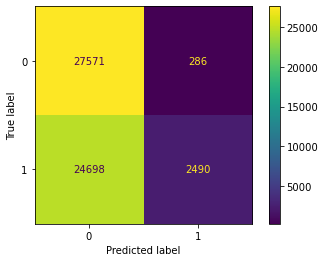

In [19]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
plot_confusion_matrix(clf, X_train, y_train)  
plt.show() 

f1 score is less acurate but th main point is to find feature importances

I have 3 basic feature importances  visualizations and computations

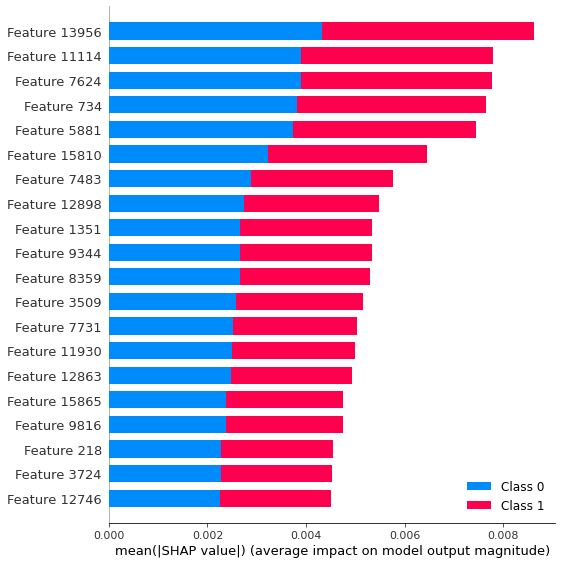

In [55]:
import shap
explainer = shap.TreeExplainer(rfclf)
shap_values = explainer.shap_values(X_transfCat.columns)
shap.summary_plot(shap_values, X_transfCat, plot_type="bar")

In this case I do not know real feature names. feature names are converted to vectores or numbers. But I can  transform them back  with get_feature_names function

In [18]:
enc.get_feature_names(['13956', '11114','7624'])

array(['13956_Aachen Frank', '13956_Aachen Klaus', '13956_Aachen Petra',
       ..., '7624_PERSONAL_PROJECTS', '7624_SIGNUP',
       '7624_SIGNUP_GOOGLE_AUTH'], dtype=object)

I took  the most omportant features only to read their real names as to read  all feature names will be computationally expensive.

I can take a peek at full list of this array that I already have  and I did it but I keep it short for this notebok  as it will be very  long list of features.

#### this helps to print full array


import sys

import numpy

numpy.set_printoptions(threshold=sys.maxsize)

So after viewing my full array of feature names I analyzed and identified what factors predict future adoption. It's mostly Creation sourse: Signup,Guest_Invite, Sighup_GoogeAuth, Org_Invite


This grouping confirms my inference asmost commong  creation sources appear

In [4]:
mydf.groupby(['name','email'])['creation_source'].agg(pd.Series.mode)

name               email                          
Aachen David       DavidAachen@yahoo.com                          SIGNUP
Aachen Diana       DianaAachen@yahoo.com                    GUEST_INVITE
Aachen Frank       FrankAachen@cuvox.de                           SIGNUP
Aachen Klaus       KlausAachen@gustr.com                    GUEST_INVITE
Aachen Petra       PetraAachen@gmail.com              SIGNUP_GOOGLE_AUTH
                                                             ...        
Østergaard Niels   NielsMstergaard@jourrapide.com             ORG_INVITE
Østergaard Nina    kijwfmun@egruv.com                  PERSONAL_PROJECTS
Østergaard Sara    SaraNstergaard@cuvox.de                    ORG_INVITE
Østergaard Tilde   TildeMstergaard@cuvox.de                   ORG_INVITE
Østergaard Torben  TorbenMstergaard@jourrapide.com     PERSONAL_PROJECTS
Name: creation_source, Length: 11981, dtype: object

Next technique weights all individual features. I tookonly first 40 as I have  alot of them. Firstplace is someone's email address.

In [44]:
feature_names = enc.get_feature_names()

Text(0.5, 0, 'Random Forest Feature Importance')

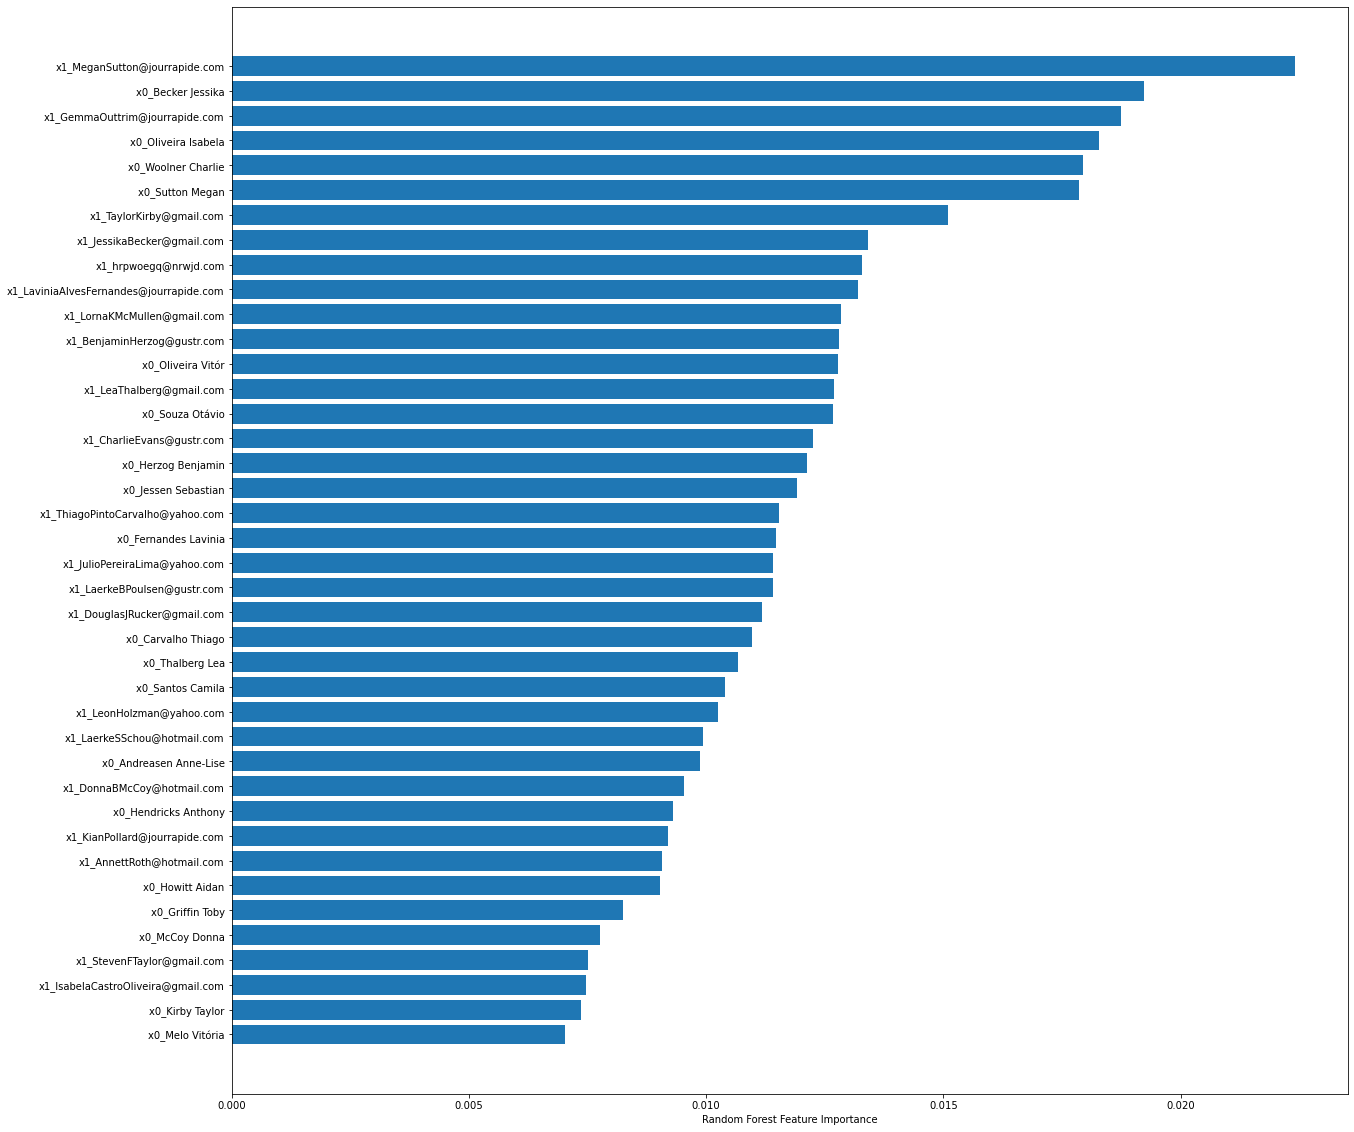

In [53]:
plt.figure(figsize=(20,20))
sorted_idx = rfclf.feature_importances_.argsort()[-40:]
plt.barh(feature_names[sorted_idx], rfclf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

Next technique computes columns importance but by columns I do not have  any important column name in my model as my model computed this.

In [39]:
for feat, importance in zip(df_join.columns, rfclf.feature_importances_):
    print ('feature: {f}, importance: {i}'.format(f=feat, i=importance))

feature: name, importance: 0.0
feature: email, importance: 0.0
feature: creation_source, importance: 0.0
feature: org_id, importance: 0.0
feature: user_id, importance: 0.0
feature: visited, importance: 0.0
feature: Active, importance: 0.0


For better and deeper analysis I can go further in details and to find something  special . It depends on what I am looking for.